<a href="https://colab.research.google.com/github/ZA3karia/Covid19-in-Morocco-study-/blob/main/Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Date & Time
from datetime import date, datetime, timedelta

warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

# plt.style.use('ggplot')
# sns.set(style="whitegrid")
plt.style.use('fivethirtyeight')
font = {
    'weight' : 'bold',
    'size'   : 13
}
plt.rc('font', **font)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
path ="/content/corona_morocco.csv"
data = pd.read_csv(path, header='infer')
data.tail(10)

,Date,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima
59,30/04/2020,4423.0,170.0,984.0,30418.0,80.0,1120.0,543.0,2.0,551.0,29.0,4.0,957.0,175.0,314.0,51.0,597.0
60,01/05/2020,4569.0,171.0,1083.0,32437.0,83.0,1157.0,546.0,2.0,573.0,29.0,4.0,1004.0,175.0,326.0,51.0,619.0
61,02/05/2020,4729.0,173.0,1256.0,34638.0,83.0,1203.0,546.0,2.0,584.0,36.0,4.0,1059.0,175.0,329.0,51.0,657.0
62,03/05/2020,4903.0,174.0,1438.0,37209.0,84.0,1265.0,548.0,2.0,619.0,39.0,4.0,1070.0,175.0,342.0,51.0,704.0
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       63 non-null     object 
 1   Confirmed                  57 non-null     float64
 2   Deaths                     46 non-null     float64
 3   Recovered                  45 non-null     float64
 4   Excluded                   54 non-null     float64
 5   Beni Mellal-Khenifra       43 non-null     float64
 6   Casablanca-Settat          46 non-null     float64
 7   Draa-Tafilalet             43 non-null     float64
 8   Dakhla-Oued Ed-Dahab       43 non-null     float64
 9   Fes-Meknes                 44 non-null     float64
 10  Guelmim-Oued Noun          43 non-null     float64
 11  Laayoune-Sakia El Hamra    43 non-null     float64
 12  Marrakesh-Safi             45 non-null     float64
 13  Oriental                   43 non-null     float64
 

In [ ]:
data["Date"] = pd.to_datetime(data['Date'], dayfirst=True)
data["Date"].dtype

dtype('<M8[ns]')

In [ ]:
## Selecting rows with history data

data = data[data["Date"] <= pd.Timestamp(date.today())]
data.tail()

,Date,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima
58,2020-04-29,4321.0,168.0,928.0,28609.0,80.0,1100.0,535.0,2.0,539.0,29.0,4.0,928.0,175.0,314.0,50.0,565.0
59,2020-04-30,4423.0,170.0,984.0,30418.0,80.0,1120.0,543.0,2.0,551.0,29.0,4.0,957.0,175.0,314.0,51.0,597.0
60,2020-05-01,4569.0,171.0,1083.0,32437.0,83.0,1157.0,546.0,2.0,573.0,29.0,4.0,1004.0,175.0,326.0,51.0,619.0
61,2020-05-02,4729.0,173.0,1256.0,34638.0,83.0,1203.0,546.0,2.0,584.0,36.0,4.0,1059.0,175.0,329.0,51.0,657.0
62,2020-05-03,4903.0,174.0,1438.0,37209.0,84.0,1265.0,548.0,2.0,619.0,39.0,4.0,1070.0,175.0,342.0,51.0,704.0


In [ ]:
# Feature Engineering
data["Tested"] = data["Confirmed"] + data["Excluded"]
data['Active'] = data['Confirmed'] - (data['Deaths'] + data['Recovered'])


## Replace Missing Data
data.fillna(method='ffill', inplace=True)
data.fillna(value=0, inplace=True)

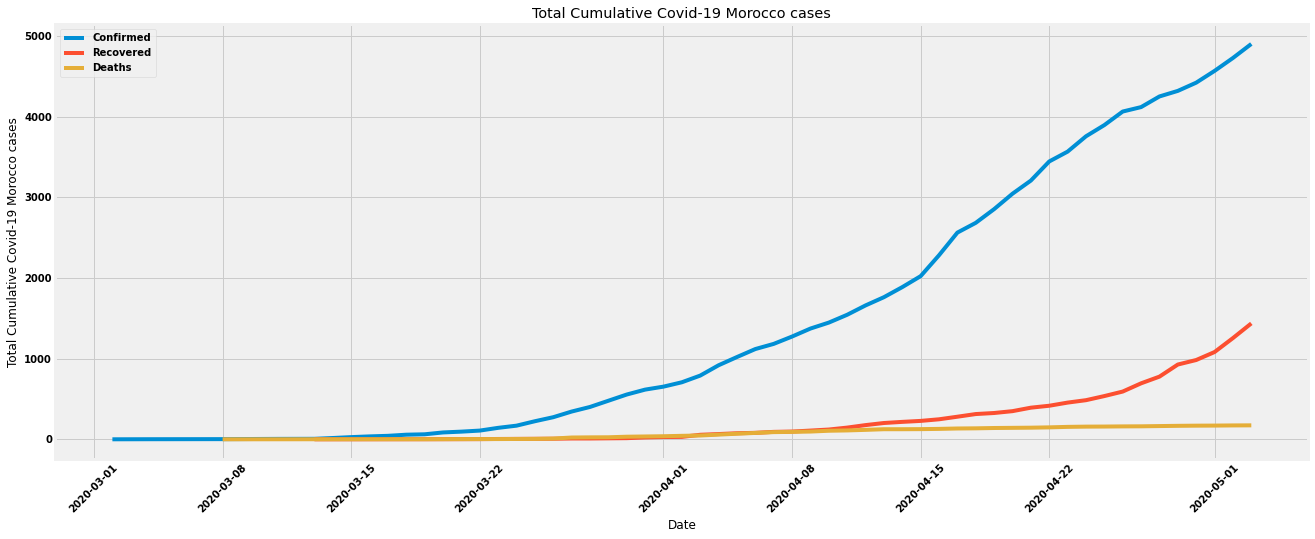

In [ ]:
title = "Covid-19 Morocco"

def lineplot(data, cols):
    """
    Line plot a list of variables with respect to date
    """
    f, ax = plt.subplots(1,1, figsize=(20, 8))
    for col in cols:
            g = sns.lineplot(x="Date", y=col, data=data, label=col)
    plt.xlabel('Date')
    plt.ylabel(f'Total Cumulative {title} cases')
    plt.title(f'Total Cumulative {title} cases')
    plt.xticks(rotation=45)
    plt.show();

lineplot(data, ['Confirmed', 'Recovered', 'Deaths'])

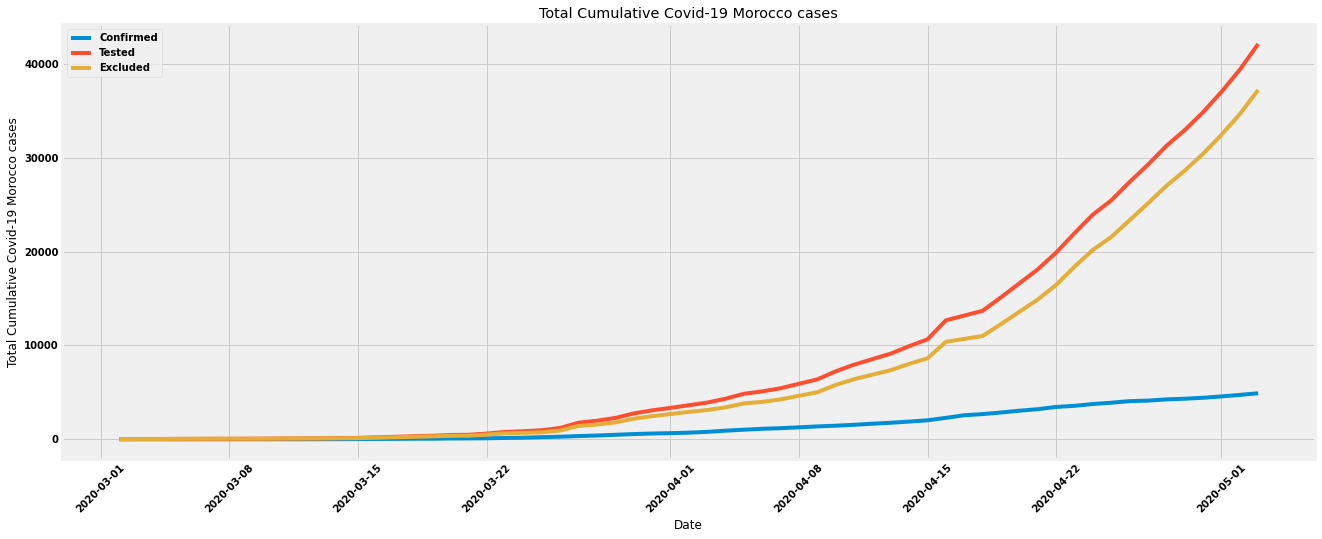

In [ ]:
## Plot of Confirmed, Tested, Excluded Cases
lineplot(data, ['Confirmed', 'Tested', 'Excluded'])

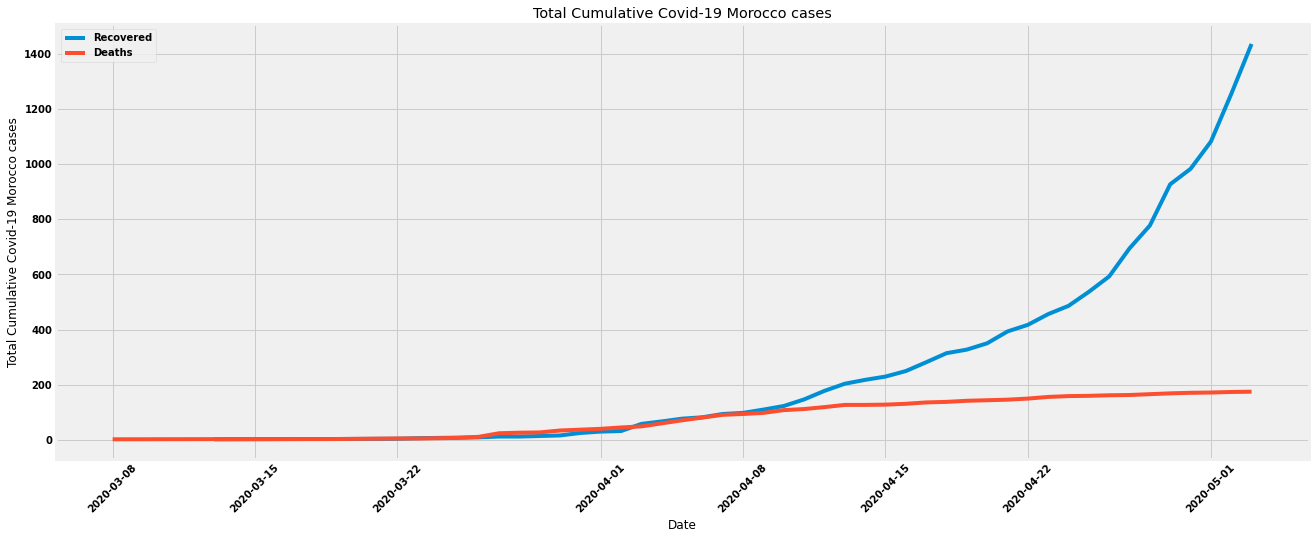

In [ ]:
## Plot of recovered and Death cases (Death Rate is critical)
lineplot(data, ['Recovered', 'Deaths'])

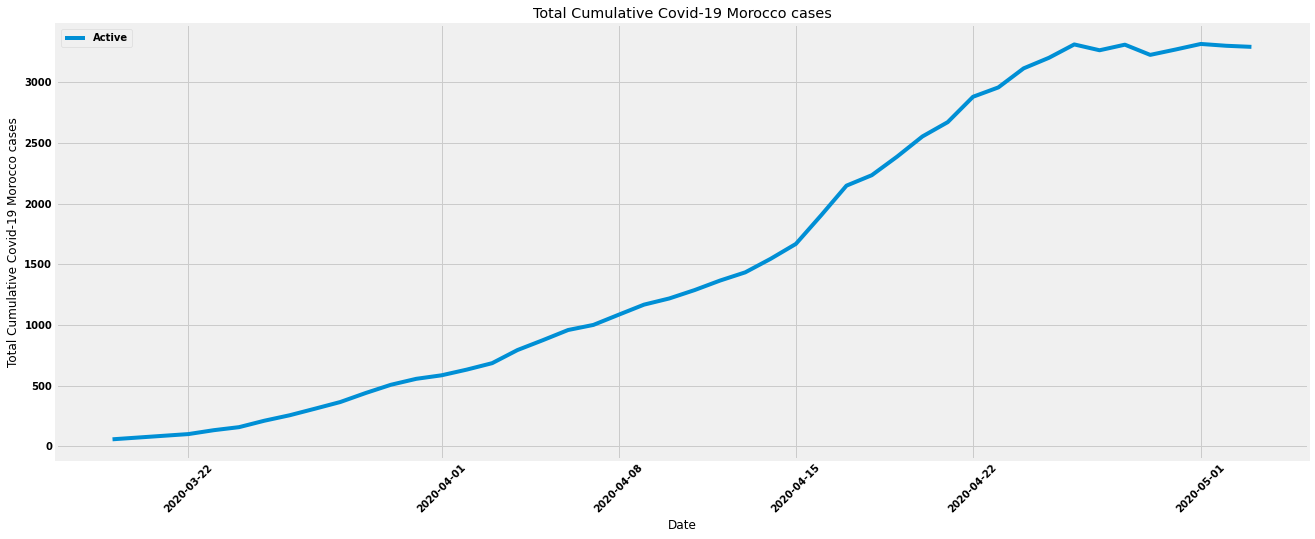

In [ ]:
## Plot of Active Cases
lineplot(data, ['Active'])

# Histogram of cases by region
## by date



In [ ]:
def plot_cases_by_region(DATE):
    dictionary = data[data.Date == DATE].to_dict(orient='records')[0]

    # Remove non-region keys
    entriesToRemove = ['Date', 'Confirmed', 'Tested', 'Excluded', 'Active', 'Deaths', 'Recovered']
    for k in entriesToRemove:
        dictionary.pop(k, None)

    ## Histogram of total cases by region
    ax = pd.Series(dictionary).plot(kind='bar', figsize=(20,8), title=f"Total Cases by region {DATE}")
    ax.set_xlabel("Region")
    ax.set_ylabel("Total Cases")
    plt.xticks(rotation=45)
    plt.grid()
    plt.show();

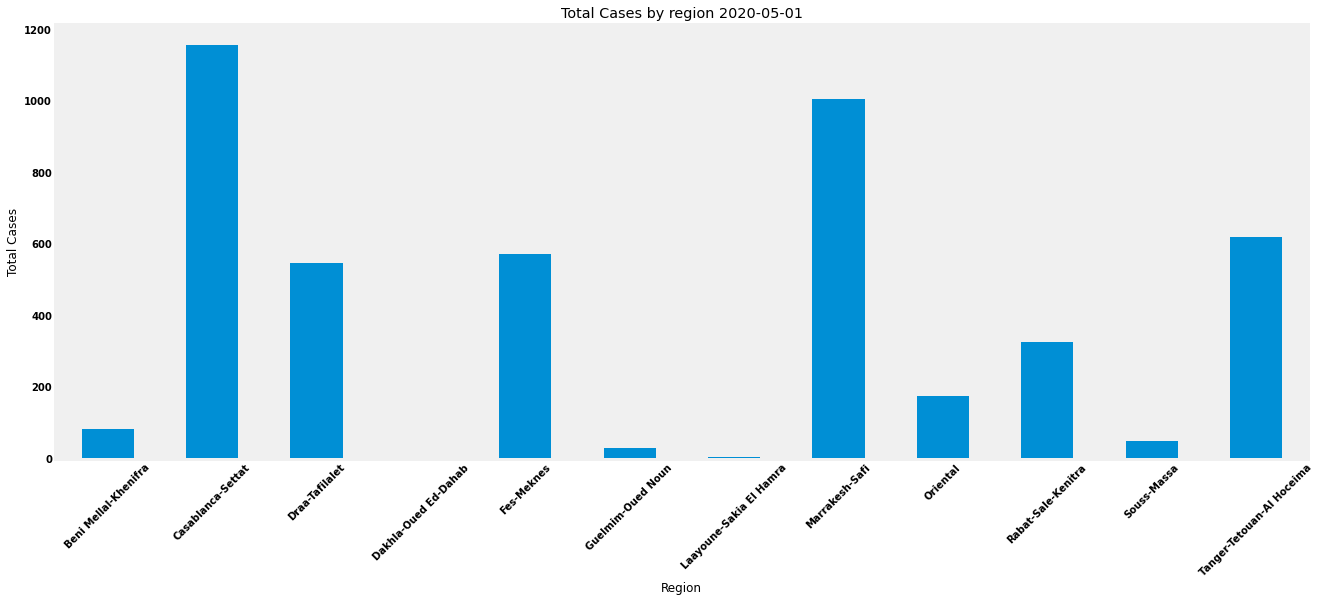

In [ ]:
DATE = "2020-05-01"
plot_cases_by_region(DATE)

In [ ]:
REGIONS= ['Beni Mellal-Khenifra', 'Casablanca-Settat', 'Draa-Tafilalet',
          'Dakhla-Oued Ed-Dahab', 'Fes-Meknes', 'Guelmim-Oued Noun',
          'Laayoune-Sakia El Hamra', 'Marrakesh-Safi', 'Oriental',
          'Rabat-Sale-Kenitra', 'Souss-Massa', 'Tanger-Tetouan-Al Hoceima']

custom_palette = sns.color_palette("Paired", 12)

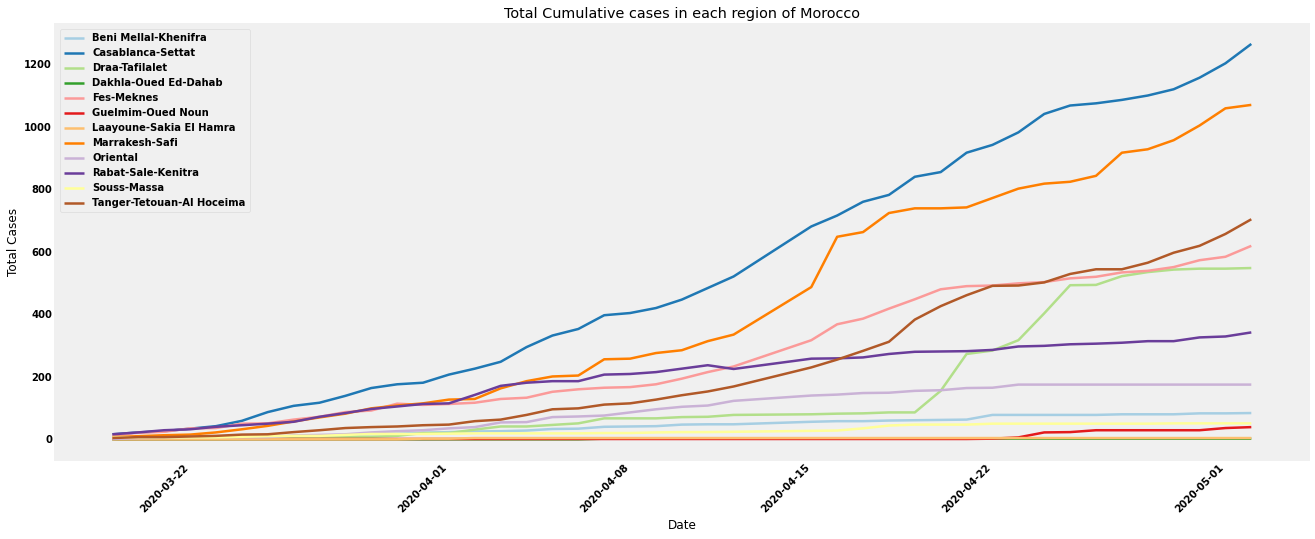

In [ ]:
plt.figure(figsize=(20, 8))
for i, col in enumerate(REGIONS):
    sns.lineplot(x='Date', y=col, data = data.iloc[17:], label=col, linewidth=2.5, color=custom_palette[i])

plt.title(f'Total Cumulative cases in each region of Morocco')
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.grid()
plt.legend();

In [ ]:
TodayData = "20"

# Calculate Proportions
TodayData[REGIONS] = TodayData[REGIONS]/ TodayData['Confirmed'].tolist()[0]

# Plot Distribution of Confirmed Cases
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,12)
TodayData[REGIONS].iloc[0, :].plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=81)
ax.set_ylabel('')
ax.set_xlabel('');

NameError: ignored